In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score 
from IPython.display import Image 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz


In [2]:
# pip install graphviz


     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00


In [4]:
df=sns.load_dataset("iris")

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [14]:
df["species"]=df["species"].replace({"setosa":0,"versicolor":1,"virginica":2})

In [15]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
64,5.6,2.9,3.6,1.3,1
29,4.7,3.2,1.6,0.2,0
89,5.5,2.5,4.0,1.3,1
96,5.7,2.9,4.2,1.3,1
114,5.8,2.8,5.1,2.4,2
17,5.1,3.5,1.4,0.3,0
84,5.4,3.0,4.5,1.5,1
58,6.6,2.9,4.6,1.3,1
137,6.4,3.1,5.5,1.8,2
7,5.0,3.4,1.5,0.2,0


In [16]:
df["species"].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [17]:
## This data is balance

In [18]:
## seggregate x and y

In [19]:
x=df.drop(columns="species")
y=df["species"]

In [20]:
## train_trst split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [22]:
dtc=DecisionTreeClassifier()

In [23]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
## evaluate

In [25]:
y_pred=dtc.predict(x_test)

In [27]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [29]:
y_pred_train=dtc.predict(x_train)
accuracy_score(y_train,y_pred_train)  ## it seems to be overfitting

1.0

In [31]:
f1_score(y_test,y_pred,average="weighted")

0.9672820512820512

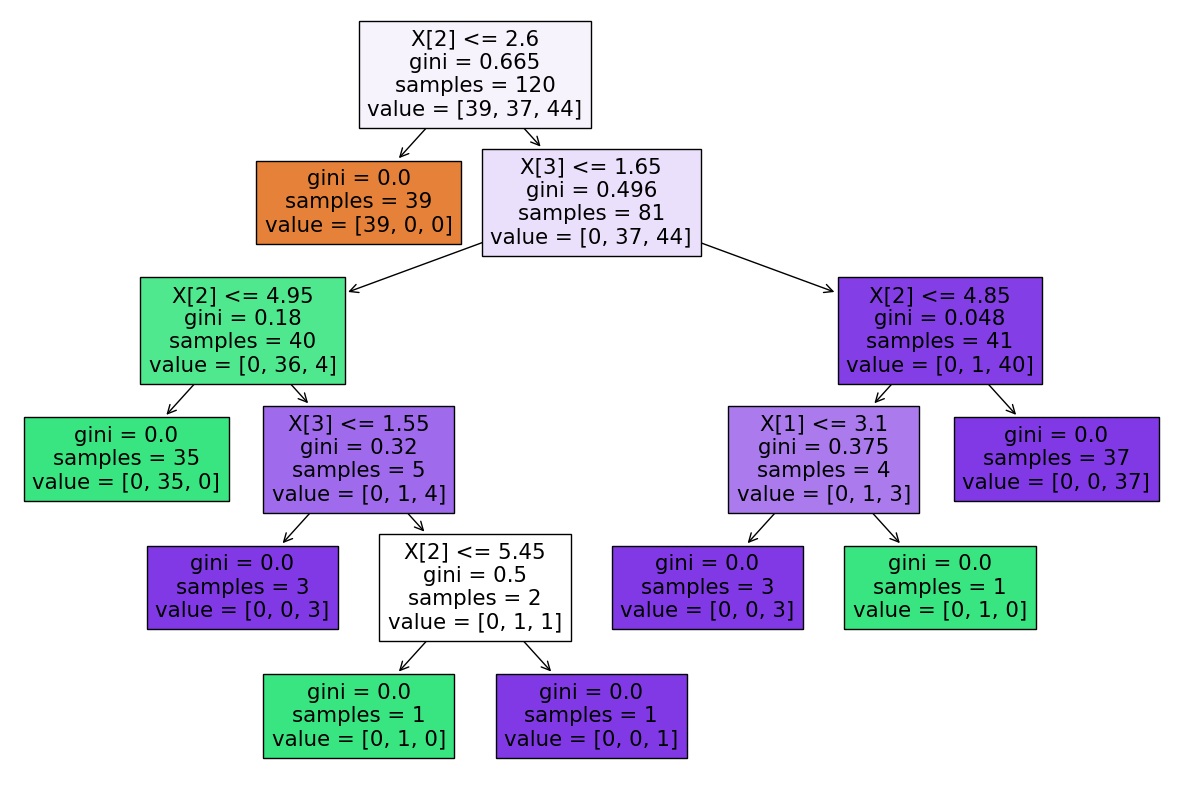

In [32]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)
plt.show()

In [40]:
dtc_u=DecisionTreeClassifier(max_depth=1)
dtc_u.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [41]:
y_pred=dtc_u.predict(x_test)
accuracy_score(y_test,y_pred)

0.5666666666666667

In [42]:
y_pred_train_u=dtc_u.predict(x_train)
accuracy_score(y_train,y_pred_train_u)

0.6916666666666667

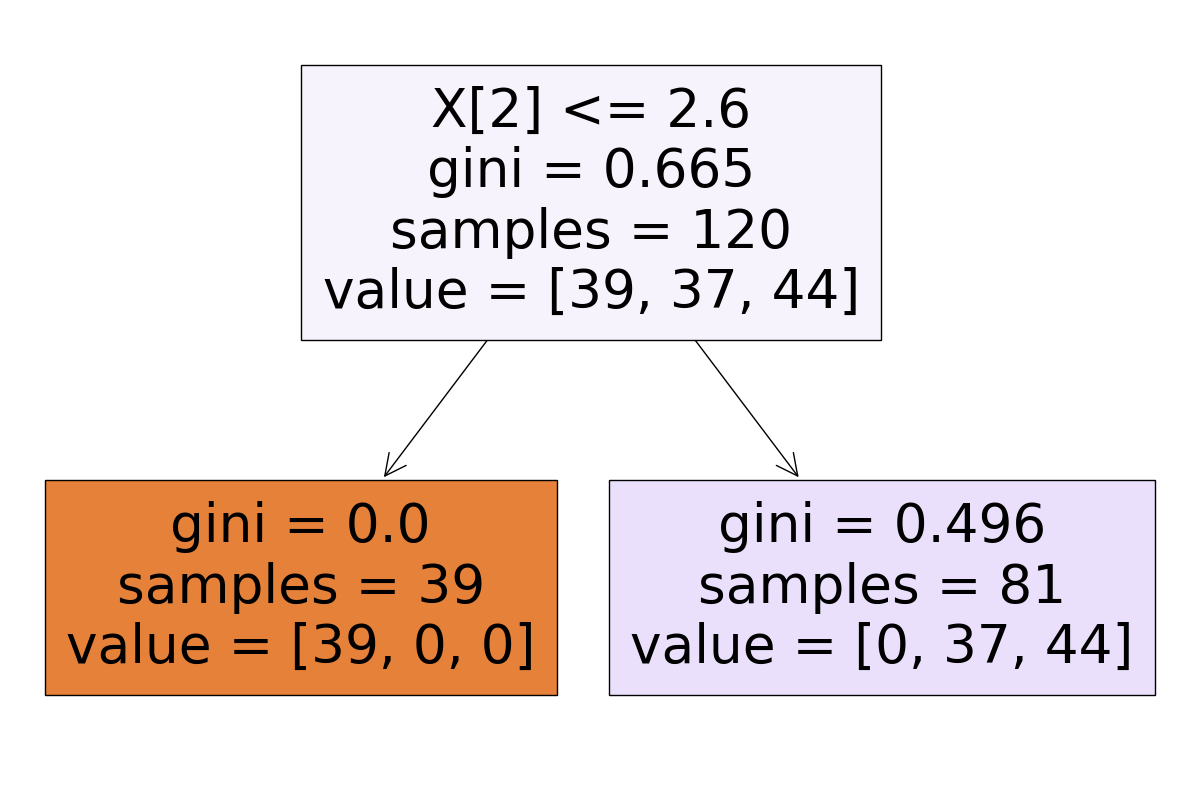

In [44]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc_u,filled=True)
plt.show()

In [47]:
 grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}


In [48]:
grid_search = GridSearchCV(estimator=dtc,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1) 


In [49]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [50]:
grid_search.best_score_

0.9916666666666668

In [51]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'random'}


In [54]:
treemodel=DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=6,min_samples_split=2,splitter='random')

In [55]:
treemodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=6, splitter='random')

In [56]:
y_pred=treemodel.predict(x_test)

In [57]:
accuracy_score(y_test,y_pred)

0.9333333333333333